In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mainData = pd.read_csv("game_logs_2.csv")

C:\Users\amjad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = mainData[["date","v_score","h_score", "day_night","v_game_number","h_game_number","attendance",
               "day_of_week","length_minutes","length_outs",'v_homeruns','h_homeruns',"v_errors",
               "h_errors"]]

In [4]:
df.dtypes

date                int64
v_score             int64
h_score             int64
day_night          object
v_game_number       int64
h_game_number       int64
attendance        float64
day_of_week        object
length_minutes    float64
length_outs       float64
v_homeruns        float64
h_homeruns        float64
v_errors          float64
h_errors          float64
dtype: object

In [5]:
#df['date'] = datetime.strptime('18710504', '%Y%m%d')
#df[['date']]

## 1- hosting team VS visiting team scores

In [6]:
#taking only the first four degits that indicate the year
df['year'] = df.date.astype(str).str[:4].astype(int)

<ipython-input-6-26ee3036bf95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.date.astype(str).str[:4].astype(int)


In [7]:
#group the targeted columns by year
yearh = df.groupby('year')['h_score'].mean()
yearv = df.groupby('year')['v_score'].mean()

Text(0.5, 0, 'Year')

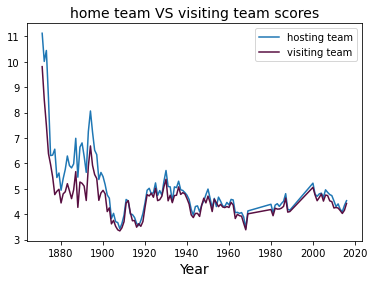

In [8]:
#plot v_team and h_team average scores by year
hteam, = plt.plot(yearh, label="hosting team")
vteam, = plt.plot(yearv, color="#580f41", label="visiting team")

plt.title('home team VS visiting team scores', size=14)
plt.legend(handles=[hteam,vteam])
plt.xlabel("Year", size=14)

#plt.savefig("home team VS visiting team scores.png")

- Through the time the hosting team get better scores than the visiting team witch indicate that there is an advantage 

In [9]:
dataset = df[['h_score','v_score']]

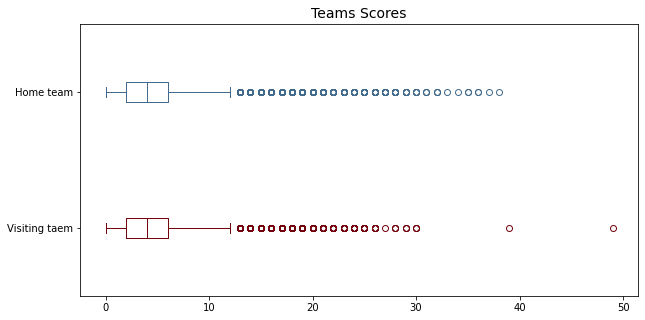

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

# Set the colors for each distribution
colors = ['#73020C' ,'#426A8C','#D94D1A']
colors_setosa = dict(color=colors[0])
colors_versicolor = dict(color=colors[1])
colors_virginica = dict(color=colors[2])

#set the figures of each feature
ax.boxplot(dataset['v_score'], positions=[1],
           boxprops=colors_setosa, medianprops=colors_setosa,
           whiskerprops=colors_setosa,capprops=colors_setosa, 
           flierprops=dict(markeredgecolor=colors[0]), vert=0)

ax.boxplot(dataset['h_score'], positions=[2],
           boxprops=colors_versicolor, medianprops=colors_versicolor,
           whiskerprops=colors_versicolor, capprops=colors_versicolor,
           flierprops=dict(markeredgecolor=colors[1]), vert=0)
#titles
ax.set_title('Teams Scores', size=14)
ax.set_yticklabels(['Visiting taem', 'Home team'])

plt.show()
#plt.savefig("Teams Scores.png")

- There are outlier values in both of teams scores so we must delete them to see the average score number of both sides.

In [11]:
#delete the outliers
score = dataset[~ (dataset[['h_score','v_score']] > 13)]

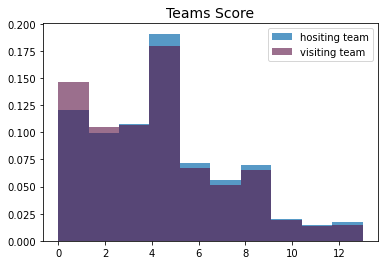

In [12]:
plt.hist(score['h_score'], density=True, alpha=0.75 )
plt.hist(score['v_score'], density=True, alpha=0.60,color="#580f41")

plt.title('Teams Score', size=14)
plt.legend(['hositing team','visiting team'])
plt.show()

In [13]:
score.describe()

,h_score,v_score
count,168636.000000,169302.000000
mean,4.477964,4.243836
std,2.948063,2.959511
min,0.000000,0.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,6.000000,6.000000
max,13.000000,13.000000


- As the graph  and the data discribtion show the average score of both sides which are are around 4.4 for home teams and 4.2 for visiting team. With standerd diveation of 3. 
- In other words home team has more chance in scoring more by 0.2.

 ## 2- Team game number in the season and the team score

In [14]:
#group the average h_team and v_team score by the team game number in the season
gameNumberv = df.groupby('v_game_number')['v_score'].mean()
gameNumberh = df.groupby('h_game_number')['h_score'].mean()

<AxesSubplot:title={'center':'Team game number VS Team Score'}, xlabel='Visiting Team Game Number', ylabel='Score'>

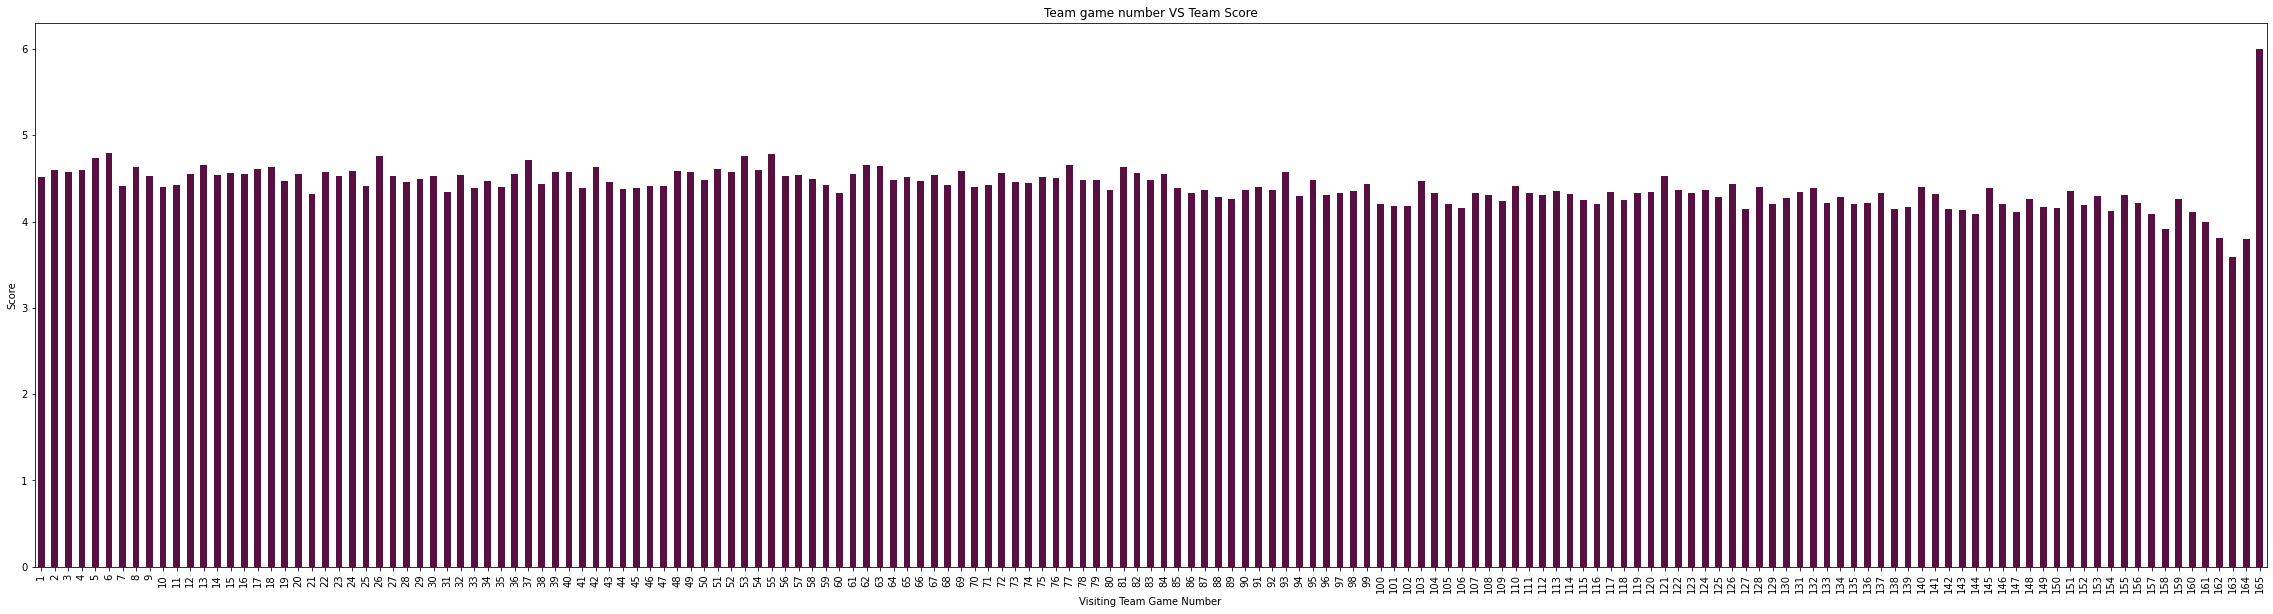

In [15]:
# bar plot of the teams scors accros the game numbers
plt.figure(figsize=(40,10))
gameNumberv.plot(kind = 'bar', title='Team game number VS Team Score',
                 xlabel='Visiting Team Game Number', ylabel='Score', color="#580f41")

(0.0, 6.0)

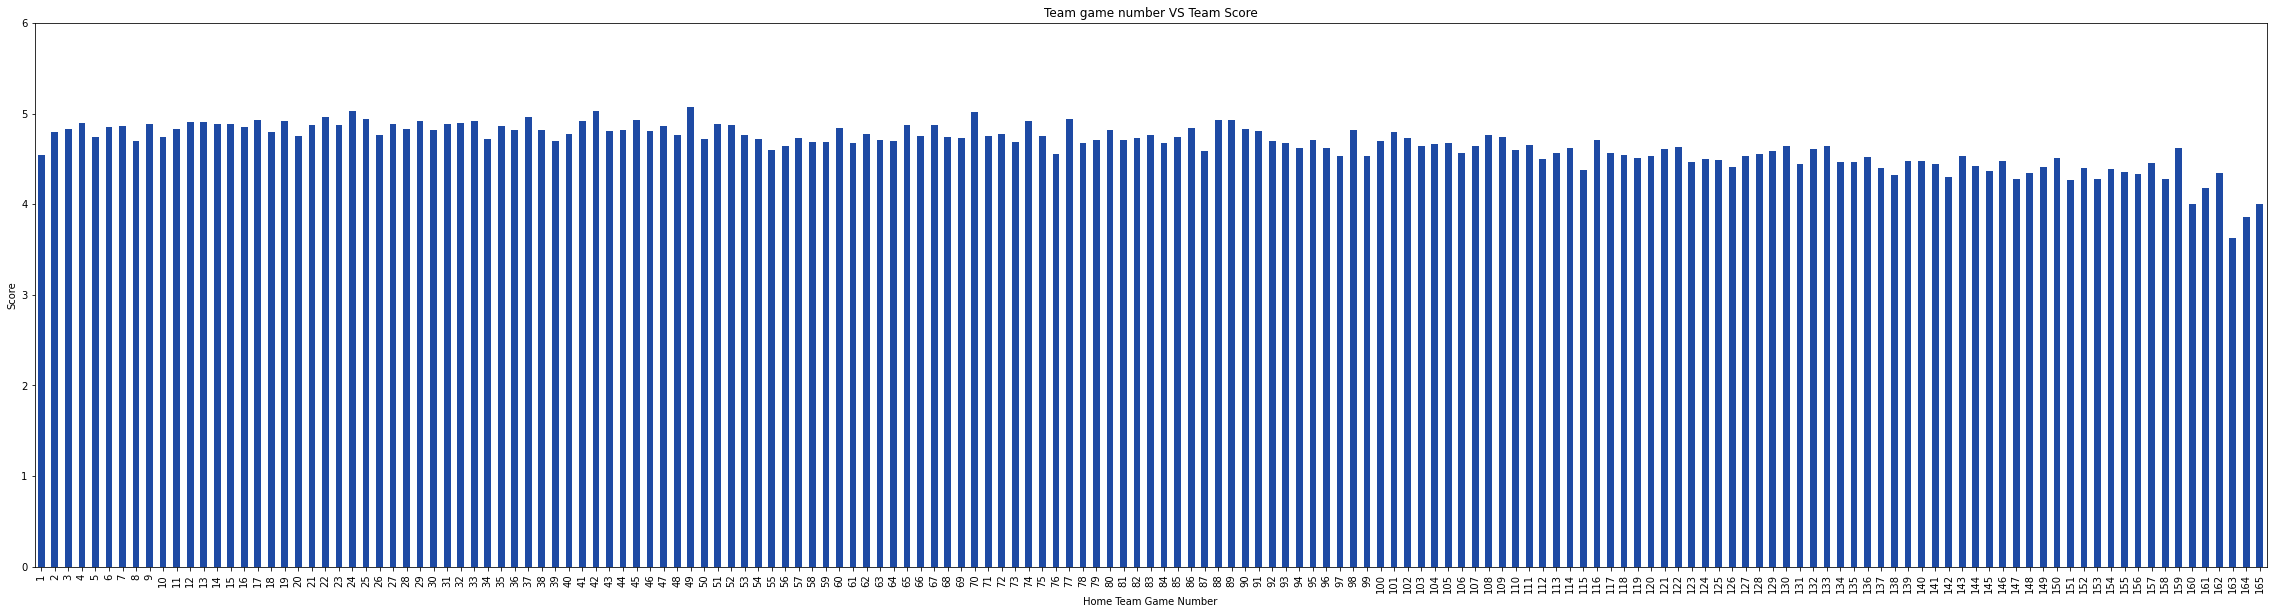

In [16]:
plt.figure(figsize=(40,10))
gameNumberh.plot(kind = 'bar',  title='Team game number VS Team Score',
                 xlabel='Home Team Game Number', ylabel='Score', color="#1E4AA4")
plt.ylim(0,6)

- There is no clear mood or pattern between the number of game and the team score in both siddes.

## 3- Number of ttendance during days of the week 

In [17]:
from pandas.api.types import CategoricalDtype

#group the average of h_team and v_team scores by the game number
attendance = df.groupby('day_of_week')['attendance'].mean()

#order the days 
df['day_of_week'] = df['day_of_week'].astype(CategoricalDtype(categories = ['Sat','Sun','Mon',
                                                                     'Tue','Wed','Thu','Fri'],
                                                      ordered=True))

<ipython-input-17-d4813653964f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['day_of_week'].astype(CategoricalDtype(categories = ['Sat','Sun','Mon',


Text(0, 0.5, 'Attendance')

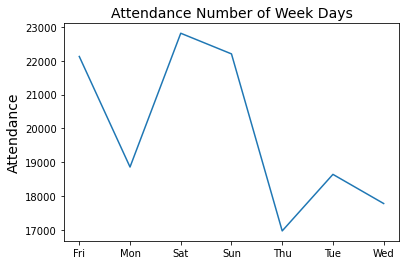

In [18]:
plt.plot(attendance)
plt.title('Attendance Number of Week Days', size=14)
plt.ylabel("Attendance", size=14)

- If you are a team manager and your team gets excited when they have more audience avoid scheduling games on Thursdays.
- If you have a business that is affected by the number of audiences -like selling food- knowing the average number of audiences each day might help planning.

## 4- Length of outs feature influance on home team/visiting team win

In [19]:
# calculate which column is greater than the other then if the visiting team win v=1, if the home team win h=0
df['vist_win'] = np.where(
    df['v_score'] > df['h_score'], 1, 0)

<ipython-input-19-d3822216c4e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vist_win'] = np.where(


Text(3.674999999999997, 0.5, 'Outs Length')

<Figure size 2880x720 with 0 Axes>

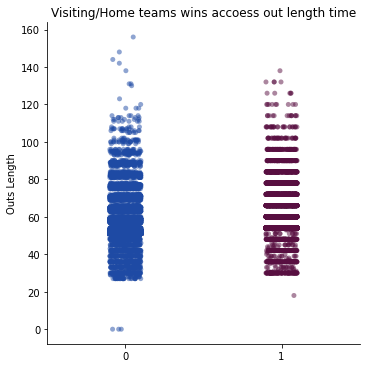

In [20]:
plt.figure(figsize=(40,10))
ax = sns.catplot(data=df, x="vist_win", y="length_outs",alpha = 0.50, palette=["#1E4AA4","#580f41"])

plt.title('Visiting/Home teams wins accoess out length time')
plt.xlabel("")
plt.ylabel('Outs Length')

- There is more density in the home team between 30 to 100 length of time .
- There is more chance for the home team to win if the length of outs is more.